In [59]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



def get_all_top_rank_files_of_one_ligand(ligand='fasudil', rank=5):
    all_ranks = {}
    for i in range(rank):
        rank_files = glob.glob('../results/' + ligand + '*/*/rank' + str(i + 1) + '_*confidence*.sdf')
        confidence_scores_per_rank = []
        for rf in rank_files:
            # print(rf.split('confidence')[-1])
            confidence_score = float(rf.split('confidence')[-1].split('.sdf')[0])
            # print(confidence_score)
            confidence_scores_per_rank.append(confidence_score)
        all_ranks[i + 1] = confidence_scores_per_rank
    all_ranks = dict(sorted(all_ranks.items(), key=lambda item:int(item[0])))
    return all_ranks


In [65]:

def calculate_distribution_of_all_scores(all_ranks, rank=5):
    from scipy.stats import gaussian_kde
    scores = []
    for i in range(rank):
        scores.extend(all_ranks[i + 1])
    scores = np.array(scores)

    scores = (scores - scores.min()) / (scores.max() - scores.min())
    
    density = gaussian_kde(scores)
    x = np.linspace(0, 1, 300)
    y = density(x)
    
    plt.figure(figsize=(6,4))
    plt.fill_between(x, y, color='lightgray', alpha=0.5)   # gray shaded background
    plt.plot(x, y, color='#3060E0', linewidth=2)           # blue line (change color as you like)
    
    plt.xlim(0, 1)
    plt.ylim(0, None)
    plt.xlabel("Normalized docking score", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.title("Ligand Docking Score Distribution", fontsize=13, fontweight='bold')
    plt.tight_layout()
    plt.show()
    return x, y

In [66]:
def plot_ligand_confidence_distribution_by_rank(ligand='fasudil', rank=1):
    all_ranks = get_all_top_rank_files_of_one_ligand(ligand, rank)
    x, y = calculate_distribution_of_all_scores(all_ranks, rank)
    return x, y

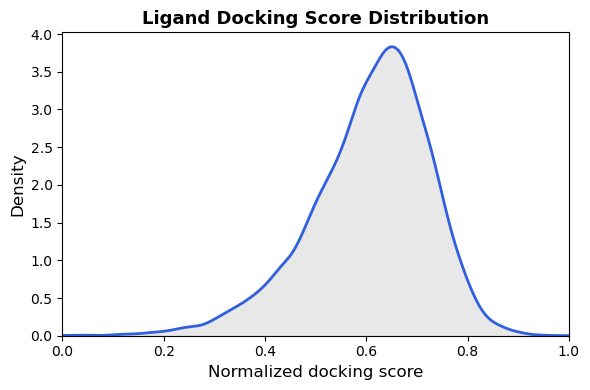

In [73]:
fasudil_x, fasudil_y = plot_ligand_confidence_distribution_by_rank('fasudil', 1)

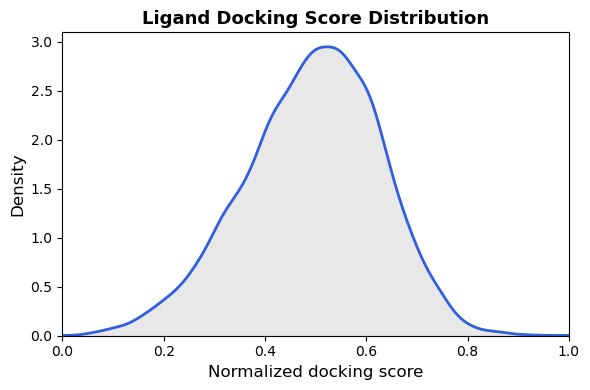

In [68]:
lig23_x, lig23_y = plot_ligand_confidence_distribution_by_rank('ligand23', 1)

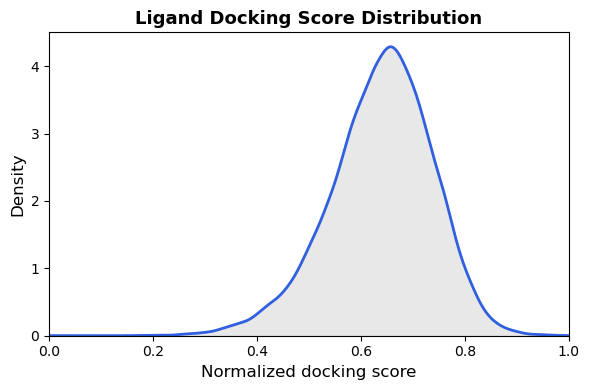

In [69]:
lig47_x, lig47_y = plot_ligand_confidence_distribution_by_rank('ligand47', 1)

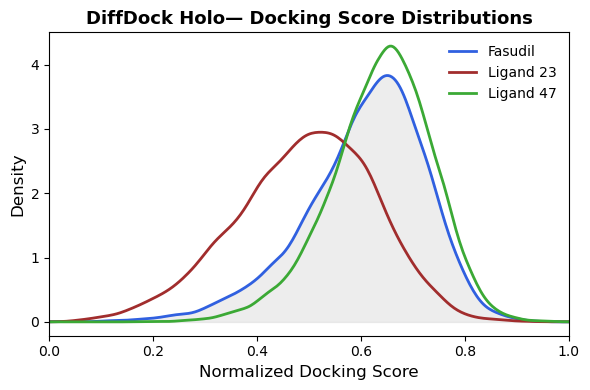

In [71]:
plt.figure(figsize=(6,4))
for (x, y, name, color) in [
    (fasudil_x, fasudil_y, 'Fasudil', '#3060E0'),
    (lig23_x,   lig23_y,   'Ligand 23', '#A12D2D'),
    (lig47_x,   lig47_y,   'Ligand 47', '#3BA935')
]:
    plt.plot(x, y, linewidth=2, label=name, color=color)

plt.fill_between(fasudil_x, fasudil_y, color='lightgray', alpha=0.4)
plt.xlim(0, 1)
plt.xlabel("Normalized Docking Score", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("DiffDock Holo— Docking Score Distributions", fontsize=13, fontweight='bold')
plt.legend(frameon=False)
plt.tight_layout()
plt.show()